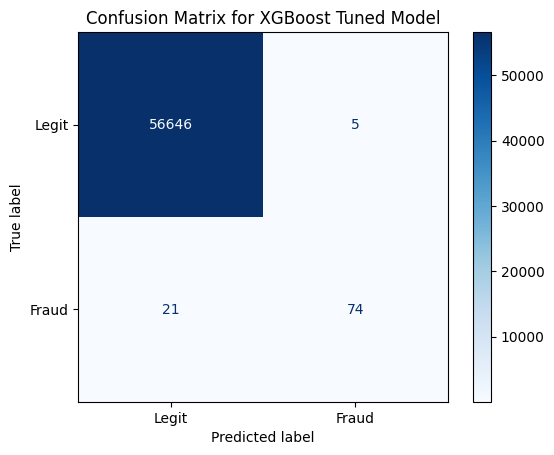

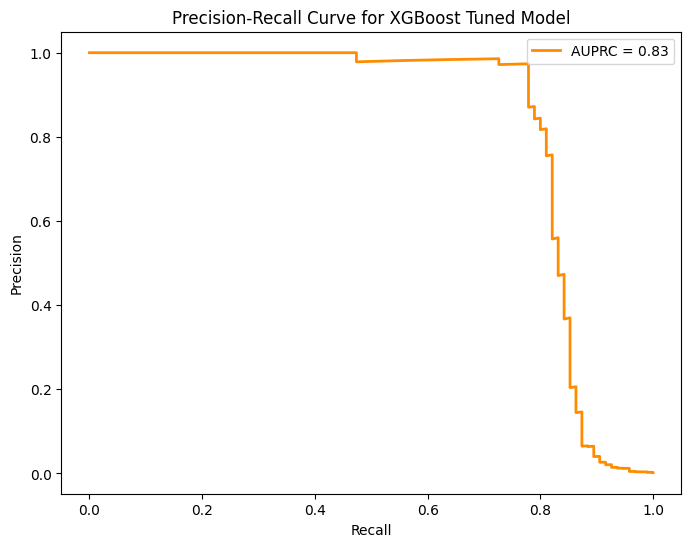

AUPRC: 0.83


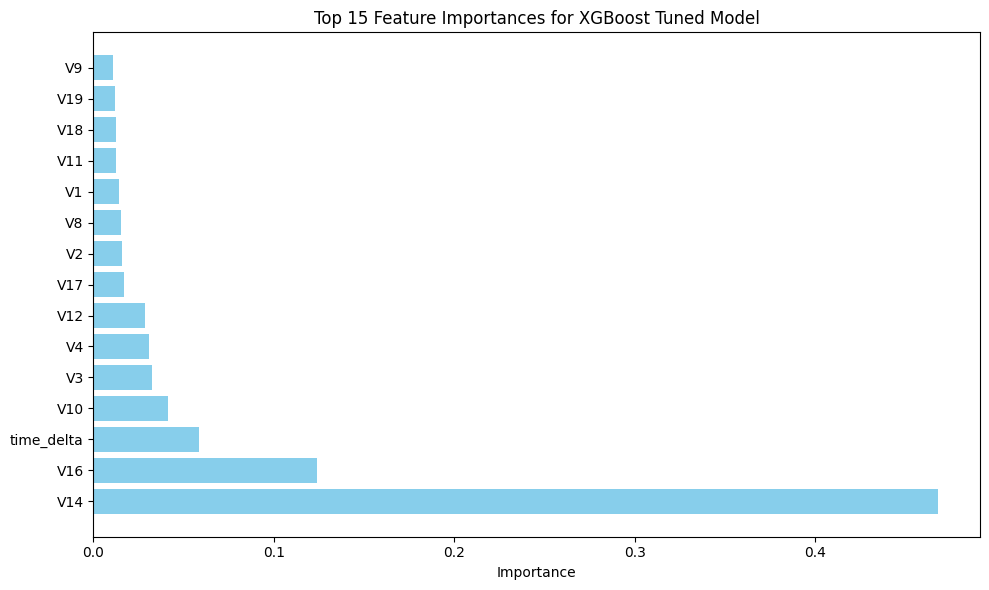

FINAL MODEL EVALUATION — XGBoost Tuned
Precision:  0.9367
Recall:     0.7789
F1 Score:   0.8506
F2 Score:   0.8061
AUPRC:      0.8290


In [6]:
# Import necessary libraries
import joblib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import(
    confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, auc,
    fbeta_score, f1_score, precision_score, recall_score
)
# Load the trained model and scaler
model = joblib.load('../models/xgb_tuned_model.pkl')
scaler = joblib.load('../models/scaler.pkl')
# Load the test data
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()
# Confusion Matrix
y_pred = model.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Legit', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Tuned Model')
plt.savefig('../reports/confusion_matrix_xgb_tuned.png')
plt.show()
# Precision-Recall Curve +AUPRC
y_proba= model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
auprc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost Tuned Model')
plt.legend()
plt.savefig('../reports/precision_recall_curve_xgb_tuned.png')
plt.show()
print(f'AUPRC: {auprc:.2f}')
# Feature Importance
feature_name= X_test.columns
importances = model.feature_importances_
feat_df= pd.DataFrame({'Feature': feature_name, 'Importance': importances})
feat_df= feat_df.sort_values(by='Importance', ascending=False).head(15)
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances for XGBoost Tuned Model')
plt.tight_layout()
plt.savefig('../reports/feature_importance_xgb_tuned.png')
plt.show()
# Final summary
print("="*50)
print("FINAL MODEL EVALUATION — XGBoost Tuned")
print("="*50)
print(f"Precision:  {precision_score(y_test, y_pred):.4f}")
print(f"Recall:     {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:   {f1_score(y_test, y_pred):.4f}")
print(f"F2 Score:   {fbeta_score(y_test, y_pred, beta=2):.4f}")
print(f"AUPRC:      {auprc:.4f}")
print("="*50)
